# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [2]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.3 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

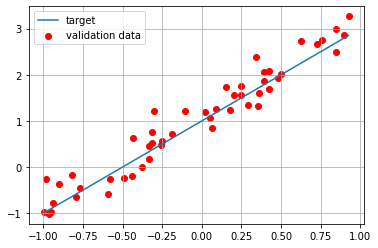

In [3]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [20]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,))) #input_shape=(1,) indica array monodimensionale

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [21]:
# get a summary of our composed model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [22]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

#batch_size significa che sto dividendo il dataset di training di 500 dati in sottogruppi da 32 elementi (15 da 32 
# e un gruppo da 20, in totale 16), su ogni gruppo calcolo calcolo il gradiente della funzione di costo. Alla fine di questa operazione
# aggiorno i pesi e i bias

Epoch 1/30
16/16 [==============================] - 0s 7ms/step - loss: 2.2242 - mse: 2.2242 - val_loss: 1.8053 - val_mse: 1.8053
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 1.6146 - mse: 1.6146 - val_loss: 1.3410 - val_mse: 1.3410
Epoch 3/30
16/16 [==============================] - 0s 2ms/step - loss: 1.2176 - mse: 1.2176 - val_loss: 1.0237 - val_mse: 1.0237
Epoch 4/30
16/16 [==============================] - 0s 2ms/step - loss: 0.9425 - mse: 0.9425 - val_loss: 0.8022 - val_mse: 0.8022
Epoch 5/30
16/16 [==============================] - 0s 2ms/step - loss: 0.7468 - mse: 0.7468 - val_loss: 0.6431 - val_mse: 0.6431
Epoch 6/30
16/16 [==============================] - 0s 2ms/step - loss: 0.6039 - mse: 0.6039 - val_loss: 0.5247 - val_mse: 0.5247
Epoch 7/30
16/16 [==============================] - 0s 2ms/step - loss: 0.4962 - mse: 0.4962 - val_loss: 0.4325 - val_mse: 0.4325
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 0.4120 - mse: 0.41

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [23]:
# return weights and biases
model.get_weights()

[array([[1.9498656]], dtype=float32), array([0.9675316], dtype=float32)]

In [24]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
#verbose=1: It controls the verbosity mode. In this case, verbose=1 means that the evaluation 
#progress and results will be displayed during the evaluation.

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 4ms/step - loss: 0.1006 - mse: 0.1006

Test loss: 0.10056523233652115
Test accuracy: 0.10056523233652115


In [25]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.0017 - mse: 0.0017    

Test loss: 0.0016855481080710888
Test accuracy: 0.0016855481080710888


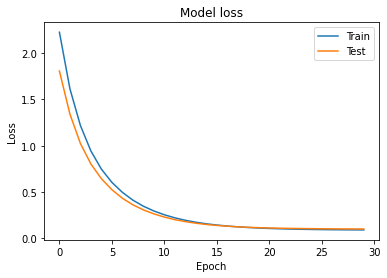

In [26]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 2ms/step


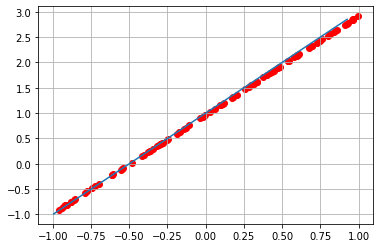

In [27]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

In [41]:
import numpy as np
import matplotlib.pyplot as plt


# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# generate training inputs
Ntrain=500
Nepochs=20
sigma=0.1

np.random.seed(0)
x_train = np.random.uniform(-1, 1, Ntrain)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

In [42]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [43]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=Nepochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),verbose=0)

#batch_size significa che sto dividendo il dataset di training di 500 dati in sottogruppi da 32 elementi (15 da 32 
# e un gruppo da 20, in totale 16), su ogni gruppo calcolo calcolo il gradiente della funzione di costo. Alla fine di questa operazione
# aggiorno i pesi e i bias

In [44]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
#verbose=1: It controls the verbosity mode. In this case, verbose=1 means that the evaluation 
#progress and results will be displayed during the evaluation.

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.013586152344942093
Test accuracy: 0.013586152344942093


In [45]:
# return weights and biases
model.get_weights()

[array([[1.9131163]], dtype=float32), array([0.98681384], dtype=float32)]

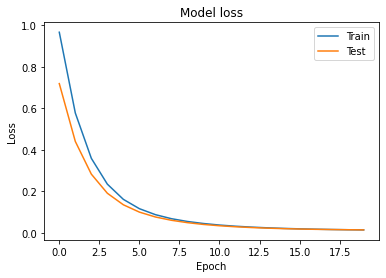

In [46]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 1ms/step


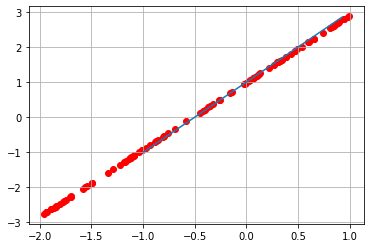

In [47]:
x_predicted = np.random.uniform(-2, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return a + b*x + c*x**2 + d*x**3


# parameters of f(x) = a+bx+cx^2+dx^3
a = 4 
b = -2 
c = -3
d = 3

# generate training inputs
Ntrain=3000
Nepochs=30
sigma=0.2

np.random.seed(0)
x_train = np.random.uniform(-1, 1, Ntrain)
x_valid = np.random.uniform(-1, 1, 300)
x_valid.sort()
y_target = f(x_valid) # ideal (target) polynomial

y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)

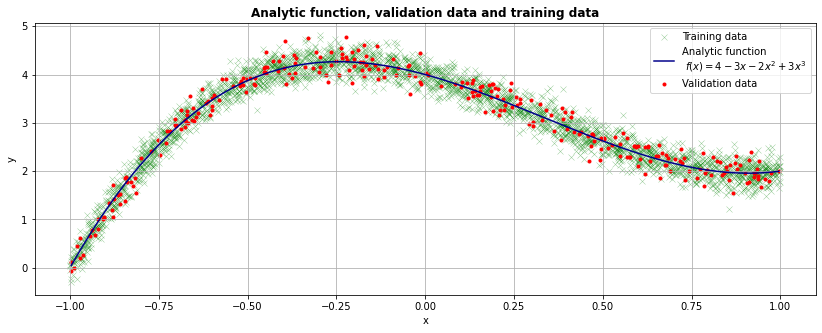

In [49]:
plt.figure(figsize=(14,5))
plt.scatter(x_train, y_train, marker = "x", color='green', label='Training data',linewidth=0.5, alpha=0.4)
plt.plot(x_valid, y_target, label = "Analytic function\n $f(x) = 4 - 3x - 2x^2 + 3x^3$", color="darkblue")
plt.scatter(x_valid, y_valid, marker = ".", color='r', label='Validation data')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Analytic function, validation data and training data", fontweight = "bold")
plt.grid()
plt.legend()
plt.show()

In [50]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()

act = 'relu'
model.add(Dense(20, input_shape=(1,), activation = act)) # nota: funzione di attivazione (esplorare quali vanno meglio)
model.add(Dense(30, activation = act))
model.add(Dense(30, activation = act))
#model.add(Dense(5, activation = act))
#model.add(Dense(5, activation = act))
model.add(Dense(1, activation = 'relu'))


# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='nadam', loss='mse', metrics=['mse'])

In [51]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=Nepochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),verbose=0)


In [52]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
#verbose=1: It controls the verbosity mode. In this case, verbose=1 means that the evaluation 
#progress and results will be displayed during the evaluation.

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.03801282122731209
Test accuracy: 0.03801282122731209


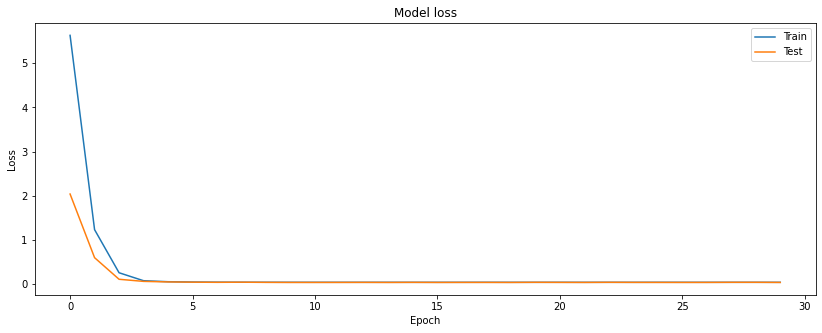

In [53]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(14,5))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 1ms/step


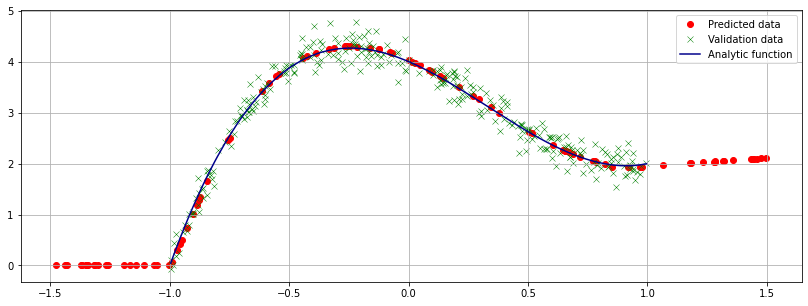

In [54]:
plt.figure(figsize=(14,5))

x_predicted = np.random.uniform(-1.5, 1.5, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label='Predicted data')
plt.scatter(x_valid, y_valid, marker = "x", color='green', label='Validation data', linewidth=0.5)
plt.plot(x_valid, f(x_valid), label='Analytic function', color="darkblue")
plt.legend()
plt.grid(True)
plt.show()

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def f(x,y):
    return np.sin(x**2+y**2)


# generate training inputs
Ntrain=10000
Nepochs=30
Nvalidation = int(Ntrain/10)
#Nvalidation = 1000
sigma=0.2

np.random.seed(0)
span=3/2

x_train = np.random.uniform(-span, span, Ntrain)
y_train = np.random.uniform(-span, span, Ntrain)

x_valid = np.random.uniform(-span, span, Nvalidation)
y_valid = np.random.uniform(-span, span, Nvalidation)

XY_train = np.column_stack((x_train,y_train))      # in the format needed
XY_valid = np.column_stack((x_valid,y_valid))      #   by `model.fit` method

z_train = np.random.normal(f(x_train,y_train), sigma) 
z_valid = np.random.normal(f(x_valid,y_valid), sigma)

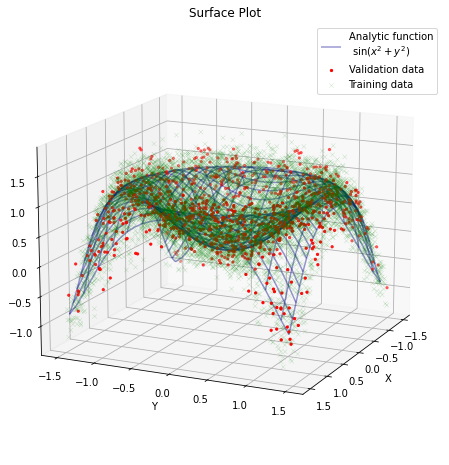

In [60]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')

x_ = np.arange(-span,span, 0.1)
y_ = np.arange(-span,span, 0.1)
X_, Y_ = np.meshgrid(x_,y_)
ax.plot_wireframe(  X_, Y_, f(X_,Y_), 
                    rstride=2, label='Analytic function\n $\sin(x^2+y^2)$', color = 'darkblue',
                    alpha =0.4)

ax.scatter(x_valid, y_valid, z_valid, marker = ".", color = "r", label='Validation data')
ax.scatter(x_train, y_train, z_train, marker = "x", color = "green",
               label='Training data', linewidth=0.3, alpha = 0.3)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Surface Plot')
ax.view_init(elev=15, azim=25)  # Adjust the elevation (vertical angle) and azimuth (horizontal angle)

plt.legend()
plt.show()

In [57]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()

act = 'tanh'
model.add(Dense(40, input_shape=(2,), activation = act)) # nota: funzione di attivazione (esplorare quali vanno meglio)
model.add(Dense(30, activation = act))
model.add(Dense(20, activation = act))
model.add(Dense(1, activation = act))


# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='nadam', loss='mse', metrics=['mse'])

In [1025]:
history = model.fit(x=XY_train, y=z_train, 
          batch_size=32, epochs=Nepochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(XY_valid, z_valid),verbose=0)

In [1026]:
# evaluate model
score = model.evaluate(XY_valid, z_valid, batch_size=32, verbose=0)
#verbose=1: It controls the verbosity mode. In this case, verbose=1 means that the evaluation 
#progress and results will be displayed during the evaluation.

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.041982777416706085
Test accuracy: 0.041982777416706085


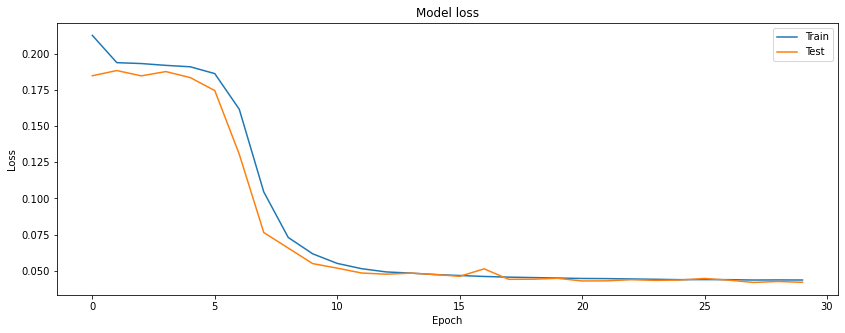

In [1027]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(14,5))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

63/63 [==============================] - 0s 794us/step


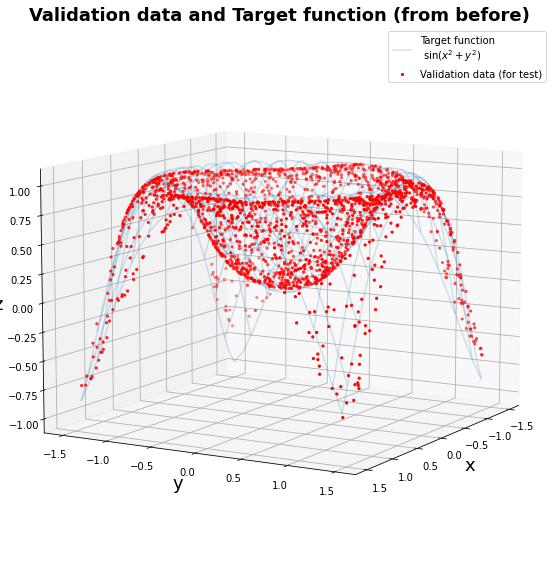

In [1028]:
# generate predictions
x_predicted = np.random.uniform(-span, span, 2000) 
y_predicted = np.random.uniform(-span, span, 2000) 
XY_predicted = np.column_stack((x_predicted,y_predicted))
z_predicted = model.predict(XY_predicted)

# plot
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection='3d')
fig.add_axes(ax)
ax.plot_wireframe(  X_surf, Y_surf, f(X_surf,Y_surf), 
                    rstride=2, cstride=2, 
                    label='Target function\n $\sin(x^2+y^2)$',
                    alpha = 0.2)
ax.scatter(x_predicted, y_predicted, z_predicted, marker = ".", color = "r", label='Validation data (for test)')
ax.set_xlabel("x", fontsize = 18)
ax.set_ylabel("y", fontsize = 18)
ax.set_zlabel("z", fontsize = 18)
plt.title("Validation data and Target function (from before)", fontsize = 18, fontweight = "bold")
ax.legend()
ax.view_init(10, 30)


plt.show()


Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

### <span style="color:green">Supplementary material: Keras model.fit available callbacks</span>

The .fit method can also get <a href=https://keras.io/callbacks/>callback</a> functions which can be used to customize the fitting procedure with special actions.

Keras provides some predefined callbacks to feed in, among them for example:
- **TerminateOnNaN()**: that terminates training when a NaN loss is encountered
- **ModelCheckpoint(filepath)**: that save the model after every epoch
- **EarlyStopping()**: which stop training when a monitored quantity has stopped improving

You can select one or more callback and pass them as a list to the callback argument of the fit method.

Now we are going to construct a callback object to represent how estimated parameters are converging during the training procedure

In [12]:
from IPython.display import clear_output

class PlotCurrentEstimate(tf.keras.callbacks.Callback):
    def __init__(self, x_valid, y_valid):
        """Keras Callback which plot current model estimate against reference target"""
        
        # convert numpy arrays into lists for plotting purposes
        self.x_valid = list(x_valid[:])
        self.y_valid = list(y_valid[:])
        self.iter=0

    def on_epoch_end(self, epoch, logs={}):
        
        temp = self.model.predict(self.x_valid, batch_size=None, verbose=False, steps=None)
        self.y_curr = list(temp[:]) # convert numpy array into list
        
        self.iter+=1
        if self.iter%10 == 0:
            clear_output(wait=True)            
            self.eplot = plt.subplot(1,1,1)
            self.eplot.clear()     
            self.eplot.scatter(self.x_valid, self.y_curr, color="blue", s=4, marker="o", label="estimate")
            self.eplot.scatter(self.x_valid, self.y_valid, color="red", s=4, marker="x", label="valid")
            self.eplot.legend()

            plt.show()

We will use also an EarlyStopping callback on the val_loss quantity. This will stop the training process as soon as the val_loss quantity does not improve anymore after an amount of epochs, preventing a long time of wated computation to take over without useful results.

<code>keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)</code>

Arguments:

- <code>monitor</code>: quantity to be monitored. 
- <code>min_delta:</code> minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement. 
- <code>patience:</code> number of epochs with no improvement after which training will be stopped. 
- <code>verbose:</code> verbosity mode. 
- <code>mode:</code> one of {auto, min, max}. In min mode, training will stop when the quantity monitored has stopped decreasing; in max mode it will stop when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity. 
- <code>baseline:</code> Baseline value for the monitored quantity to reach. Training will stop if the model doesn't show improvement over the baseline. 
- <code>restore_best_weights:</code> whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.

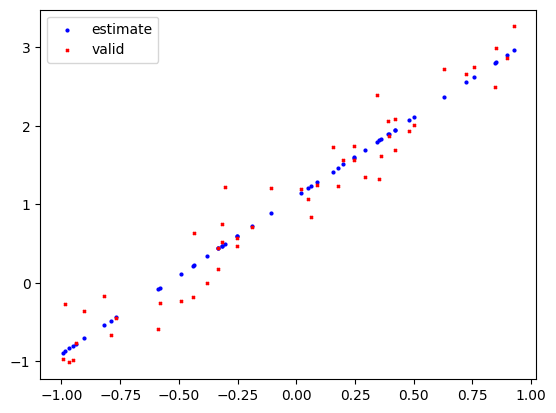

2/2 [==============================] - 0s 101ms/step - loss: 0.0808 - mse: 0.0808 - val_loss: 0.0808 - val_mse: 0.0808


[array([[2.0087578]], dtype=float32), array([1.1064383], dtype=float32)]

In [13]:
plot_estimate = PlotCurrentEstimate(x_valid, y_valid)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

model.fit(x_valid, y_valid, batch_size=32, epochs=150,
          validation_data=(x_valid, y_valid),
          callbacks=[ plot_estimate, earlystop]
          )

model.get_weights()